<h3 align="center"> Membres du groupe </h3>

  
- **CISSE  Mohamedou** 
- **DIALLO Abdoulaye**
- **DIALLO Aboubacar**
- **NIANG  Mamadou**
- **OUNI   Safa**


<h3 align="center"> TELECOM CHURN ANALYSIS: IBM DATASET </h3>



Dans cette étude, nous modélisons une variable "Résiliation de contrat par les clients" pour une société de télécommunication implantée dans les différentes villes de l'Etat de Californie aux Etats-Unis. Il s'agit de prédire si un client va résilier ou pas son contrat avec la société en question.

Notre base de données contient 7043 observations et 33 variables portant sur les clients de ladite société. Parmi ces dernières, on retrouve "Churn Value", notre variable cible qui prend la valeur 1 si le client résilie son contrat et 0 sinon. Les informations complètes sur les autres variables sont disponibles sur le lien suivant: https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113

La base de données est accessible à partir du lien suivant: https://www.google.com/url?q=https%3A%2F%2Fcommunity.ibm.com%2Faccelerators%2F%3Fcontext%3Danalytics%26query%3Dtelco%2520churn%26type%3DData%26product%3DCognos%2520Analytics&source=datasetsearch

Au début de notre étude, nous effectuons une prise en main de la base de données en affichant les noms, les types et les caractéristiques des différentes variables. Ensuite on passe au calcul des différentes statistiques des variables. Puis nous allons effectuer quelques visualisations graphiques, souvent issues de croisement entre différentes variables. Pour finir avec la modélisation.


<h3 align="center"> TABLE DES MATIERES </h3>

- I. **IMPORTATION ET ANALYSES PRELIMINAIRES DE LA BD**

    - I.1 *EDA (Exploraty Data Analysis)*
    - I.2 *Etude des corrélations*
        - I.2.1 Corrélations quanti vs quanti
        - I.2.2 Corrélations quali vs quali
        - I.2.3 Corrélations quanti vs quali
      
- II. **MODELISATION**

    - II.1 *MODELES NON OPTIMISES*
        
    - II.2 *MODELES OPTIMISES (AVEC DONNEES EQUILIBREES)*
        -  II.2.1 Random Forest
        -  II.2.2 Régression Logistique
        -  II.2.3 KNN
    
- III. **CONCLUSION**

# I. IMPORTATION ET ANALYSES PRELIMINAIRES DE LA BD

In [1]:
#Importation des packages nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick 
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, validation_curve
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline


In [2]:
#Pour ne pas afficher les warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
df0 = pd.read_excel("Telco_customer_churn.xlsx") # Importation de la base de données

In [4]:
# On crée une fonction qui nous explicite, au besoin, la signification d'une variable donnée

dico=pd.read_excel("dictionnaire.xlsx")

def de(col):
    b=dico[dico["variables"]==col].iloc[0,1]
    print("La définition de", col, "est :", b, "\n")
    return 

de('Contract')

La définition de Contract est : Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year. 



## I.1 EDA (Exploraty Data Analysis)

In [5]:
df0.shape # Affichage de la dimension du data frame

(7043, 33)

In [6]:
df0.head() # Affichage des 5 premières observations

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [7]:
df0.describe() # Calcul des statistiques descriptives

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [8]:
df0.info() # Affichage des infos (nom, type, nombre de cases non nulles) des variables 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

On remarque que la variable 'Total Charges' est qualitative alors qu'on s'attendait à ce qu'elle soit qauntitative.

In [342]:
df0.nunique() # Nombre de modalités de chaque variable

CustomerID           7043
Count                   1
Country                 1
State                   1
City                 1129
Zip Code             1652
Lat Long             1652
Latitude             1652
Longitude            1651
Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          73
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1585
Total Charges        6531
Churn Label             2
Churn Value             2
Churn Score            85
CLTV                 3438
Churn Reason           20
dtype: int64

In [343]:
# Pourcentage des valeurs manquantes de chaque variable
percent_missing = df0.isnull().sum() * 100 / len(df0)
percent_missing

CustomerID            0.000000
Count                 0.000000
Country               0.000000
State                 0.000000
City                  0.000000
Zip Code              0.000000
Lat Long              0.000000
Latitude              0.000000
Longitude             0.000000
Gender                0.000000
Senior Citizen        0.000000
Partner               0.000000
Dependents            0.000000
Tenure Months         0.000000
Phone Service         0.000000
Multiple Lines        0.000000
Internet Service      0.000000
Online Security       0.000000
Online Backup         0.000000
Device Protection     0.000000
Tech Support          0.000000
Streaming TV          0.000000
Streaming Movies      0.000000
Contract              0.000000
Paperless Billing     0.000000
Payment Method        0.000000
Monthly Charges       0.000000
Total Charges         0.000000
Churn Label           0.000000
Churn Value           0.000000
Churn Score           0.000000
CLTV                  0.000000
Churn Re

In [9]:
# Fct retournant pour chaque variable le type, les 5 premières modalités et ainsi que le nbre de modalité 
def report(df):
    col = []
    d_type = []
    uniques = []
    n_uniques = []
    
    for i in df.columns:
        col.append(i)
        d_type.append(df[i].dtypes)
        uniques.append(df[i].unique()[:5])
        n_uniques.append(df[i].nunique())
    
    return pd.DataFrame({'Column': col, 'd_type': d_type, 'unique_sample': uniques, 'n_uniques': n_uniques})

In [10]:
report(df0)

,Column,d_type,unique_sample,n_uniques
0,CustomerID,object,"[3668-QPYBK, 9237-HQITU, 9305-CDSKC, 7892-POOK...",7043
1,Count,int64,[1],1
2,Country,object,[United States],1
3,State,object,[California],1
4,City,object,"[Los Angeles, Beverly Hills, Huntington Park, ...",1129
5,Zip Code,int64,"[90003, 90005, 90006, 90010, 90015]",1652
6,Lat Long,object,"[33.964131, -118.272783, 34.059281, -118.30742...",1652
7,Latitude,float64,"[33.964131, 34.059281, 34.048013, 34.062125, 3...",1652
8,Longitude,float64,"[-118.272783, -118.30742, -118.293953, -118.31...",1651
9,Gender,object,"[Male, Female]",2


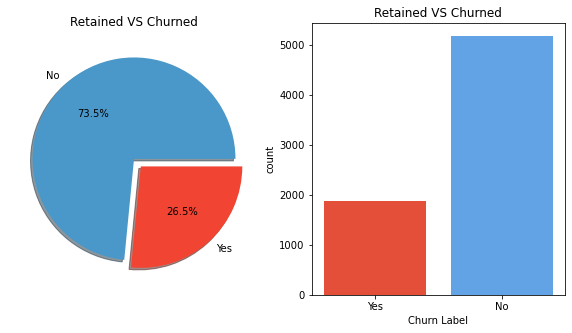

In [344]:
a, b =[plt.cm.Blues, plt.cm.Reds ] #Création de couleurs

f,ax=plt.subplots(1,2,figsize=(10,5))
df0['Churn Label'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True, colors=[a(0.6), b(0.6)])
ax[0].set_title('Retained VS Churned')
ax[0].set_ylabel('')

sns.countplot('Churn Label',data=df0,ax=ax[1], palette=['#FF3A1C',"#4ba3fa"])
ax[1].set_title('Retained VS Churned') 
plt.show()

En divisant les individus de notre base de données entre "*les abonnés*" et "*les désabonnés*", on observe que **73.5%** (un peu plus de **5000** personnes) sont toujours abonnés, contre **26.5%** (moins de **2000** personnes) qui ne sont plus clients de la société en question.

In [11]:
df0['Tenure Months'].describe() #Statistiques descriptives de la variable "durée d'ancienneté du client"

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: Tenure Months, dtype: float64

<AxesSubplot:xlabel='Tenure Months'>

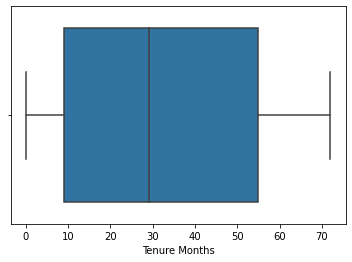

In [12]:
sns.boxplot(df0['Tenure Months']) #Box plot de la variable "durée d'ancienneté du client"

Text(0.5, 1.0, 'Number of Customers by their tenure')

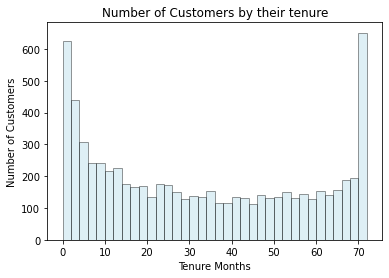

In [345]:
#Distribution de la variable Tenure Months
ax = sns.distplot(df0['Tenure Months'], hist=True, kde=False, 
             bins=int(180/5), 
             hist_kws={'edgecolor':'black'}
             )
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Tenure Months')
ax.set_title('Number of Customers by their tenure')

On observe que notre société de télécommunication possède à peu près **625** nouveaux clients (avec une durée d'ancienneté de *moins de 2 mois*) et environ **650** clients fidèles ( avec une durée d'ancienneté de *plus de 70 mois*).

Text(0.5, 1.0, 'Number of Customers by Contract Type')

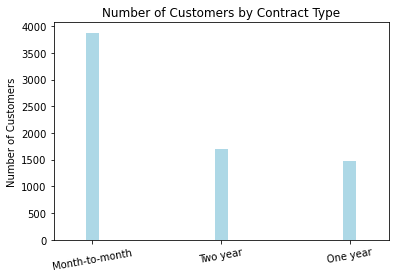

In [346]:
#Distribution des clients en fonction de la nature de leur contrat

ax = df0['Contract'].value_counts().plot(kind = 'bar',rot = 10, width = 0.1)
ax.set_ylabel('Number of Customers')
ax.set_title('Number of Customers by Contract Type')

Ce graphique nous affiche la répartition des clients en fonction du type de leur contrat. On observe que le contrat *mensuel* est le plus demandé par les clients, suivi du contrat *bisannuel*.

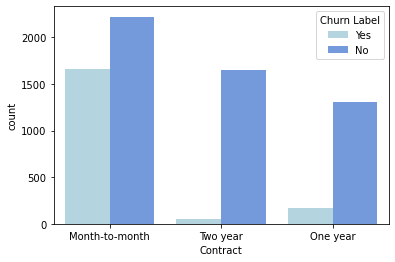

In [78]:
ax=sns.countplot(x='Contract', hue = 'Churn Label',data = df0)

On observe aisement que le *taux de désabonnement* est *très élevé* chez les clients ayant un *contrat mensuel*, suivi de ceux qui ont un *contrat annuel*. On peux donc dire, à priori, que plus la durée du contrat est petite, plus la probabilité de désabonnement est élevée.

Text(0.5, 1.0, 'Two Year Contract')

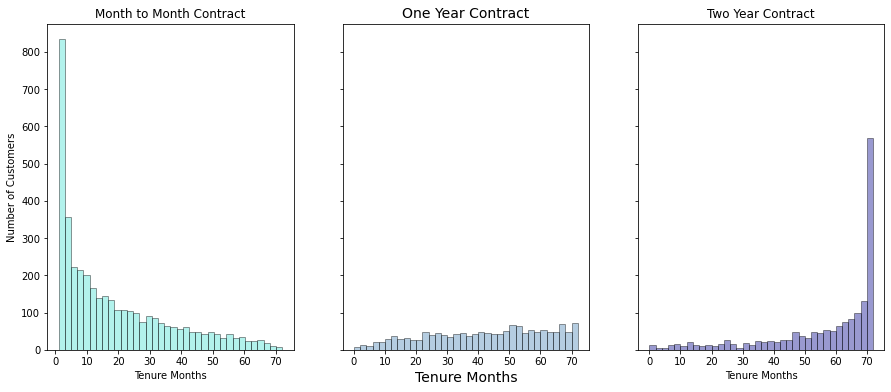

In [13]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (15,6))

ax = sns.distplot(df0[df0['Contract']=='Month-to-month']['Tenure Months'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'turquoise',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Tenure Months')
ax.set_title('Month to Month Contract')



ax = sns.distplot(df0[df0['Contract']=='One year']['Tenure Months'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure Months',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(df0[df0['Contract']=='Two year']['Tenure Months'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure Months')
ax.set_title('Two Year Contract')

Pour des soucis de détails concernant les variables "durée d'ancienneté" et "Type du contrat", l'on a croisé ces 2 dernières.
Le résultat stipule que presque tous les nouveaux clients sont engagés avec un contrat mensuel tandis que les clients fidèles priviligient plutôt le contrat de 2 ans, en général.

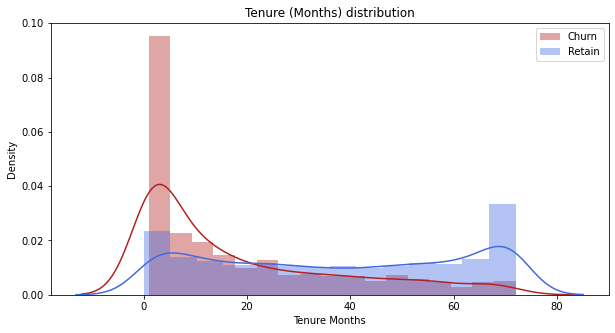

In [14]:
plt.figure(figsize=(10,5))
plt.title('Tenure (Months) distribution')
sns.distplot(df0[df0['Churn Label'] == 'Yes']['Tenure Months'], label='Churn',color="firebrick")
sns.distplot(df0[df0['Churn Label'] == 'No']['Tenure Months'], label='Retain',color="royalblue")
plt.legend(loc= 'upper right')
plt.show()

D'après la visualisation ci-dessus, nous pouvons voir que plus la durée de souscription augmente, plus la probabilité de résiliation diminue.

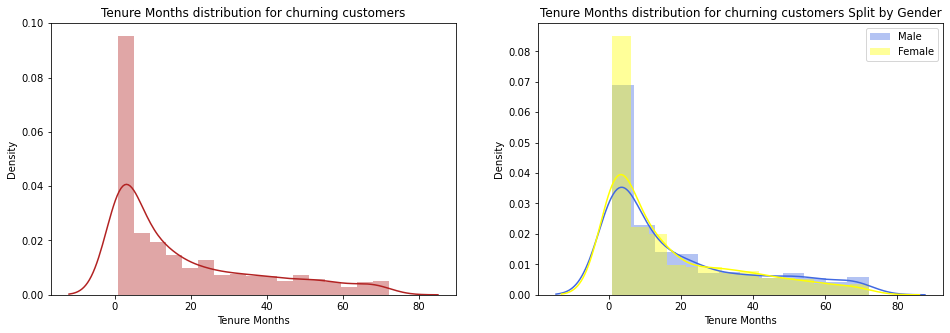

In [347]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.title('Tenure Months distribution for churning customers')
sns.distplot(df0[df0['Churn Label'] == 'Yes']['Tenure Months'], label='Churn', color="firebrick")
plt.subplot(1,2,2)
plt.title('Tenure Months distribution for churning customers Split by Gender')
sns.distplot(df0[(df0['Churn Label'] == 'Yes') & (df0['Gender'] == 'Male')]['Tenure Months'], label='Male', color="royalblue")
sns.distplot(df0[(df0['Churn Label'] == 'Yes') & (df0['Gender'] == 'Female')]['Tenure Months'], label='Female', color="yellow")
plt.legend()
plt.show()

Le graphique d'à droite nous présente la distribution des désabonnés en fonction du genre.

<br/>Ainsi on observe qu'il y'a plus de femmes que d'hommes parmi les clients qui se sont désabonnés après *moins de 15 mois* d'abonnement. Mais aussi il y'a plus d'hommes que de femmes parmi les clients qui se sont désabonnés après *plus de 50 mois* d'abonnement.

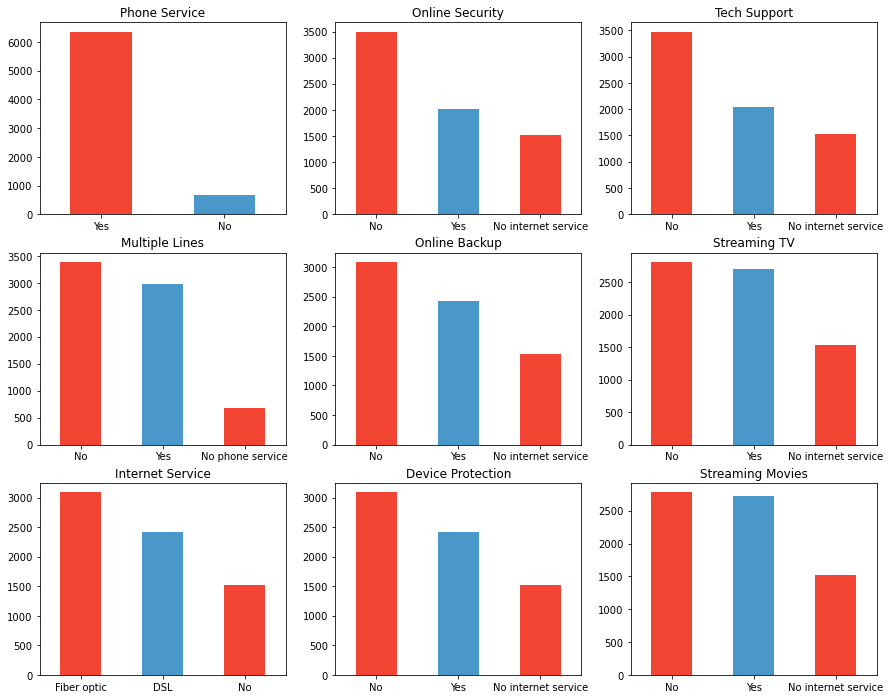

In [18]:
services = ['Phone Service','Multiple Lines','Internet Service','Online Security',
           'Online Backup','Device Protection','Tech Support','Streaming TV','Streaming Movies']


a, b =[plt.cm.Blues, plt.cm.Reds ] # Création de couleurs
fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = df0[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0, color=[b(0.6), a(0.6)])
        
    elif i >=3 and i < 6:
        ax = df0[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0, color=[b(0.6), a(0.6)])
        
    elif i < 9:
        ax = df0[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0, color=[b(0.6), a(0.6)])
    ax.set_title(item)

En divisant les individus de notre base de données entre "les abonnés" et "les désabonnés", l'on observe que 73.5% (un peu plus de 5000 personnes) sont toujours abonnés, contre 26.5% (moins de 2000 personnes) qui ne sont plus clients de la société en question. 

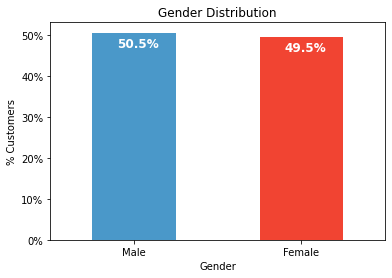

In [20]:
ax = (df0['Gender'].value_counts()*100.0 /len(df0)).plot(kind='bar',stacked = True,rot = 0,color=[a(0.6), b(0.6)])
                                                                      
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

<AxesSubplot:xlabel='Gender', ylabel='count'>

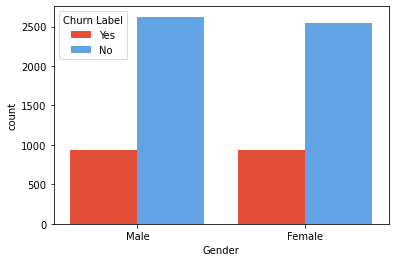

In [21]:
sns.countplot(x='Gender', hue = 'Churn Label',data = df0,palette=['#FF3A1C',"#4ba3fa"] )

In [22]:
df0.groupby('Churn Label')['Gender'].value_counts(normalize=True).to_frame().rename(columns={'Gender': 'Ratio'}).reset_index().sort_values('Churn Label')

,Churn Label,Gender,Ratio
0,No,Male,0.507344
1,No,Female,0.492656
2,Yes,Female,0.502408
3,Yes,Male,0.497592


Les déabonnés sont constitués de 50,24% de femmes et de 49,75% d'hommes. Donc, à priori, on peut dire qu'il y a absence d'inégalité de genre quant au désabonnement des clients.


Text(0.5, 1.0, '% of Senior Citizens')

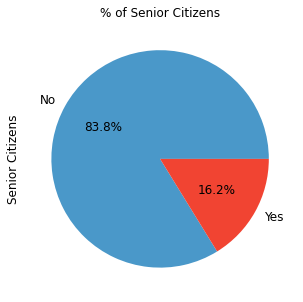

In [23]:
ax = (df0['Senior Citizen'].value_counts()*100.0 /len(df0))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12, colors=[a(0.6), b(0.6)])                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

Parmi les clients de plus de 65 ans, seul 16.2% d'entre eux se sont désabonnés.

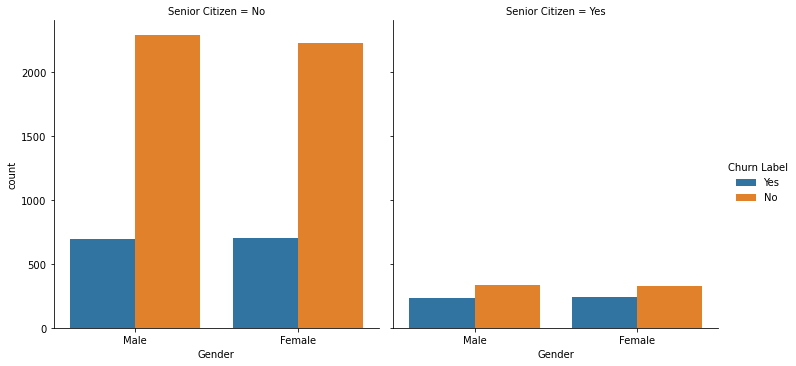

In [24]:
sns.catplot(x='Gender', hue='Churn Label', col='Senior Citizen', kind='count', data=df0)

In [25]:
by_gender_senior = df0.groupby(['Senior Citizen', 'Gender'])['Churn Label'].value_counts(normalize=True).to_frame().rename(columns={'Churn Label': 'Ratio'}).reset_index().sort_values('Senior Citizen')
by_gender_senior

,Senior Citizen,Gender,Churn Label,Ratio
0,No,Female,No,0.760616
1,No,Female,Yes,0.239384
2,No,Male,No,0.767192
3,No,Male,Yes,0.232808
4,Yes,Female,No,0.577465
5,Yes,Female,Yes,0.422535
6,Yes,Male,No,0.588850
7,Yes,Male,Yes,0.411150


D'après la visualisation ci-dessus, nous pouvons voir que le taux de résiliation des seniors, hommes et femmes, est presque le même. De même pour le taux de résiliation pour les personnes non âgées.

In [26]:
by_gender_partner = df0.groupby(['Partner', 'Gender'])['Churn Label'].value_counts(normalize=True).to_frame().rename(columns={'Churn Label': 'Ratio'}).reset_index().sort_values('Partner')
by_gender_partner

,Partner,Gender,Churn Label,Ratio
0,No,Female,No,0.655556
1,No,Female,Yes,0.344444
2,No,Male,No,0.684954
3,No,Male,Yes,0.315046
4,Yes,Female,No,0.811019
5,Yes,Female,Yes,0.188981
6,Yes,Male,No,0.795799
7,Yes,Male,Yes,0.204201


D'après la visualisation ci-dessus, les femmes et les hommes qui n'ont pas de partenaire sont plus susceptibles de faire une résiliation.

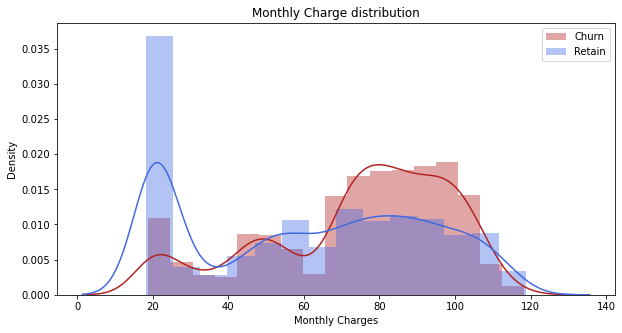

In [27]:
plt.figure(figsize=(10,5))
plt.title('Monthly Charge distribution')
sns.distplot(df0[df0['Churn Label'] == 'Yes']['Monthly Charges'], label='Churn',color="firebrick")
sns.distplot(df0[df0['Churn Label'] == 'No']['Monthly Charges'], label='Retain',color="royalblue")
plt.legend(loc= 'upper right')
plt.show()

Il y a un pic de rétention des clients dont le coût mensuel est d'environ 25 dollar.
Les clients qui effectuent des transactions par mois d'un montant moyen supérieur à 65 dollar seront plus susceptibles de se désabonner que ceux dont la transaction mensuelle est inférieure à ce montant.

D'après la visualisation ci-dessus, on peut voir que la majorité des clients dont les charges mensuelles sont autour de 25$ sont des clients dont la durée 'Tenure Months' est inférieure à 50 mois.

Text(0.5, 1.0, 'Count By churn Reason')

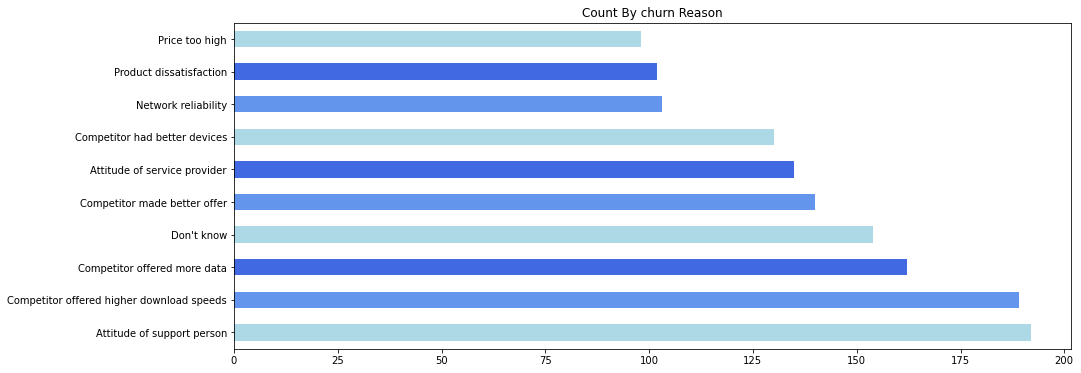

In [348]:
# Affichage des raisons principales de churn
color = [ "Lightblue","cornflowerblue","royalblue"]
sns.set_palette(color)
plt.figure(figsize=(15,6))
df0['Churn Reason'].value_counts()[:10].plot(kind='barh',color=sns.color_palette())
plt.title('Count By churn Reason')

## I.2 Etude des corrélations

### I.2.1 Corrélations quanti vs quanti

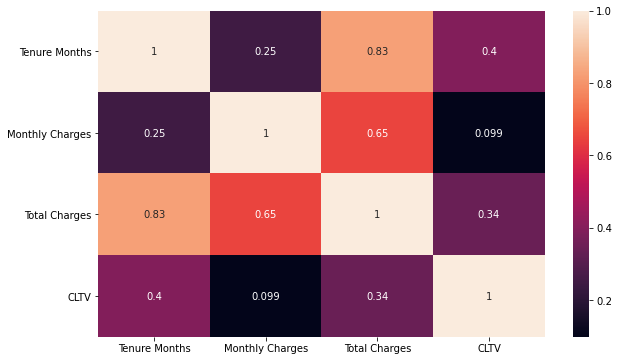

In [349]:
df0['Total Charges'] = pd.to_numeric(df0['Total Charges'], errors='coerce')
df0['Total Charges'].fillna(df0['Total Charges'].median(), inplace=True)

variables_num = df0[['Tenure Months', 'Monthly Charges', 'Total Charges', 'CLTV']]
corr_df = variables_num.corr(method='pearson')
plt.figure(figsize=(10, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

On voit qu'il n'y a aucune coorélation entre les variables quantitatives à part celle qui existe entre *Tenure Months* et *Total Charges*.
<br/> Ainsi on décide de supprimer la variable *Tenure Months*.

In [350]:
df0.drop ("Tenure Months", inplace=True, axis=1)

### I.2.2 Corrélation quali vs quali (Test de Khi2)

Le test utilisé pour détecter une éventuelle dépendance entre 2 variables catégorielles est celui du **Khi-deux d'indépendance**. Ici on l'utilise pour voir les différentes variables catégorielles qui ont une relation de dépendance avec notre variable cible (*churn value*).

In [351]:
#Test de chi2
df = df0.copy()
df['Total Charges'] = pd.to_numeric(df0['Total Charges'], errors='coerce')
# Chi squared Independence test between categorical values and Churn. This will help to identify important variables on which Churn depends.
# Based on the test, we can recommend to drop/include them in while training
def chi2test(X,y,alpha=0.05):
    '''
        X : dataframe 
        y : series
    '''
    target = y.name
    print('ch2test with alpha',alpha)
    test_df = []
    for index,col in X.select_dtypes(include=['object']).columns.to_series().items():
        df = pd.concat([y,X[col]],axis=1)
        contingency_table = df.value_counts().rename("counts").reset_index().pivot(index=target,columns=col,values='counts').fillna(0)
        stat, p, dof, expected = chi2_contingency(contingency_table.values)
        test_df.append([target,col,stat,p,'Dependent (reject H0)' if p <= alpha else 'Independent (H0 holds true)','include' if p <= alpha else 'drop'])
        
    test_df = pd.DataFrame(test_df,columns=["variable1","variable2","chi2-stat","p-value","result","recommendation"])
    return test_df

chi2test(df.drop('Churn Value',axis=1),df['Churn Value'])

ch2test with alpha 0.05


,variable1,variable2,chi2-stat,p-value,result,recommendation
0,Churn Value,CustomerID,7043.000000,4.943977e-01,Independent (H0 holds true),drop
1,Churn Value,Country,0.000000,1.000000e+00,Independent (H0 holds true),drop
2,Churn Value,State,0.000000,1.000000e+00,Independent (H0 holds true),drop
3,Churn Value,City,1233.567219,1.497540e-02,Dependent (reject H0),include
4,Churn Value,Lat Long,1745.965514,5.117984e-02,Independent (H0 holds true),drop
5,Churn Value,Gender,0.484083,4.865787e-01,Independent (H0 holds true),drop
6,Churn Value,Senior Citizen,159.426300,1.510067e-36,Dependent (reject H0),include
7,Churn Value,Partner,158.733382,2.139911e-36,Dependent (reject H0),include
8,Churn Value,Dependents,433.734379,2.500972e-96,Dependent (reject H0),include
9,Churn Value,Phone Service,0.915033,3.387825e-01,Independent (H0 holds true),drop


Les variables qui ont une *p-value* supérieure à **0.05** signifie qu'elles sont *indépendantes* de notre variable cible (*churn value*). 
<br/>Donc durant la modélisation, on n'utilisera pas cesdites variables.

In [352]:
#Suppression des variables ayant une p-value supérieure à 0.05
df = df.drop(['CustomerID', 'Count', 'Gender', 'Country','State','Zip Code','Lat Long', 'Latitude', 'Longitude','Churn Label','Churn Score','Churn Reason'], axis = 1)
print(df.columns)

Index(['City', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Value', 'CLTV'],
      dtype='object')


### I.2.3 Corrélation quanti vs quali (ANOVA)

Dans la littérature, pour savoir si une variable quantitative joue un role sur l'apparition des modalités d'une autre variable qualitative, on utilise de l'*ANOVA*. Ici donc à l'aide de l'Analyse de la variance on mesure la significativité de l'effet que nos variables quantitatives ont sur la variable cible.

In [353]:
df1 = df.copy()
df1['ChurnValue'] = df1['Churn Value']
df1['MonthlyCharges'] = df1['Monthly Charges']
df1['TotalCharges'] = df1['Total Charges']

import statsmodels.api
result1 = statsmodels.formula.api.ols('ChurnValue ~ MonthlyCharges',data=df1).fit()
result2 = statsmodels.formula.api.ols('ChurnValue ~ TotalCharges',data=df1).fit()
result3 = statsmodels.formula.api.ols('ChurnValue ~ CLTV',data=df1).fit()

tab1 = statsmodels.api.stats.anova_lm(result1)
tab2 = statsmodels.api.stats.anova_lm(result2)
tab3 = statsmodels.api.stats.anova_lm(result3)

tab1

,df,sum_sq,mean_sq,F,PR(>F)
MonthlyCharges,1.0,51.332834,51.332834,273.463704,2.706646e-60
Residual,7041.0,1321.690878,0.187714,NaN,NaN


In [354]:
tab2

,df,sum_sq,mean_sq,F,PR(>F)
TotalCharges,1.0,54.393241,54.393241,290.439831,7.508609e-64
Residual,7041.0,1318.630470,0.187279,NaN,NaN


In [355]:
tab3

,df,sum_sq,mean_sq,F,PR(>F)
CLTV,1.0,22.307300,22.307300,116.283252,6.679131e-27
Residual,7041.0,1350.716412,0.191836,NaN,NaN


Les variables quantitatives qui ont une *p-value* inférieure à **0.05** signifie qu'elles ont un effet significatif dans l'apparition des modalités de notre variable cible. Et par conséquent, elles doivent être prises en compte lors de la modélisation.
<br/>Et on voit, d'après le test ci-dessus, que toutes les 3 variables (*'Total Charges'*, *'Monthly Charges'* et *'CLTV'*) ont un *effet significatif*.

# II. Modélisation

Pour la modélisation, on utilisera 3 modèles à savoir la *régression logistique*, le *KNN* et le *Random Forest*.

<br/> On scindera cette partie en 2 sous-parties. La première consitera à utiliser ces modèles avec leurs paramètres par defaut et tout au long de la seconde sous-partie, on se souciera plus de l'optimisation de ces paramètres afin d'avoir de meilleures performances.


In [356]:
#ENCODAGE DES VARIABLES QUALITATIVES
encoder = OneHotEncoder(sparse=False)
df_clean = df.copy() #df après avoir supprimé toutes les variables à supprimer
var_text = ['City', 'Phone Service','Senior Citizen', 'Partner', 'Dependents', 'Multiple Lines', 'Internet Service', 'Online Security','Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method']

for i in var_text:
    a = encoder.fit_transform(np.array(df[i]).reshape((-1, 1))) # -1 car nbre de lignes inconnu
    df_clean = pd.concat([df_clean, pd.DataFrame(a, columns=encoder.categories_[0], index=df.index)], axis=1)
    df_clean.drop(i, axis=1, inplace=True)
    
df_clean.head()

,Monthly Charges,Total Charges,Churn Value,CLTV,Acampo,Acton,Adelanto,Adin,Agoura Hills,Aguanga,...,Yes,Month-to-month,One year,Two year,No,Yes,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,53.85,108.15,1,3239,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,70.70,151.65,1,2701,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,99.65,820.50,1,5372,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,104.80,3046.05,1,5003,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,103.70,5036.30,1,5340,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [357]:
#STANDARDISATION DES VARIABLES QUANTITATIVES 
X = df_clean.drop(['Churn Value'], axis=1)
y = df_clean['Churn Value']

scaler = StandardScaler()
c = ['Monthly Charges','CLTV','Total Charges']
a = scaler.fit_transform(X[c])
a
standard = pd.DataFrame(a, columns=c, index=X.index)
standard
X.drop(c, axis=1, inplace=True)
X_transformed = pd.concat([standard, X], axis=1)
X_transformed.head()

,Monthly Charges,CLTV,Total Charges,Acampo,Acton,Adelanto,Adin,Agoura Hills,Aguanga,Ahwahnee,...,Yes,Month-to-month,One year,Two year,No,Yes,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,-0.362660,-0.981675,-0.959674,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.197365,-1.436462,-0.940470,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.159546,0.821409,-0.645186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.330711,0.509483,0.337349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.294151,0.794358,1.216004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [91]:
#Train set and test set
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, stratify=y, random_state=42)

## II.1 MODELES NON OPTIMISES

In [328]:
#Entrainement
model_rf = RandomForestClassifier()
model_rl = LogisticRegression()
model_knn= KNeighborsClassifier()

model_rf.fit(X_train, y_train)
model_rl.fit(X_train, y_train)
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [329]:
#PREDICTION
y_predict_rf = model_rf.predict(X_test)
y_predict_rl = model_rl.predict(X_test)
y_predict_knn = model_knn.predict(X_test)

In [330]:
# Accuracy moyenne du modèle RF sur le train set
cross_val_score (model_rf, X_train, y_train, cv=5, scoring ='accuracy').mean()

0.79765390440677

In [331]:
# Accuracy moyenne du modèle RL sur le train set
cross_val_score (model_rl, X_train, y_train, cv=5, scoring ='accuracy').mean()

0.8015594932080485

In [96]:
# Accuracy moyenne du modèle KNN sur le train set
cross_val_score (model_knn, X_train, y_train, cv=5, scoring ='accuracy').mean()

0.7701433094668093

Les 3 scores précédents représentent l'*accuracy moyenne* des différents modèles suite à une *cross-validation*.
<br/> En effet, avec la validation croisée, on divise l'échantillon en 5 Forlds, et par conséquent après les 5 combinaisons d'entraînements et de tests, l'algorithme nous retourne l'*accuracy moyenne*.
<br/> En se basant sur ces résultats, on voit qu'en moyenne, sur le train set, la **RL** reste le meilleur modèle.

L'objectif étant d'apprendre le modèle à bien prédire les nouvelles non vues, il serait donc incensé de se limiter à ce stade.
<br/> Ainsi le code suivant nous permettra de comparer encore les accuracy de ces modèles mais cette fois-ci évalués sur le *test set*. 

In [97]:
#Accuracy sur le test set
accuracy_modele_rf = accuracy_score(y_test, y_predict_rf)
accuracy_modele_rl = accuracy_score(y_test, y_predict_rl)
accuracy_modele_knn = accuracy_score(y_test, y_predict_knn)
print('Pourcentage de bien classés pour le modele RF:',accuracy_modele_rf)
print('Pourcentage de bien classés pour le modele RL:',accuracy_modele_rl)
print('Pourcentage de bien classés pour le modele KNN:',accuracy_modele_knn)

Pourcentage de bien classés pour le modele RF: 0.794180269694819
Pourcentage de bien classés pour le modele RL: 0.7863733144073811
Pourcentage de bien classés pour le modele KNN: 0.758694109297374


On voit que la donne a l'air de changer à une petite précision près. Sur le *test set*, c'est bien le **RF** qui fait mieux.

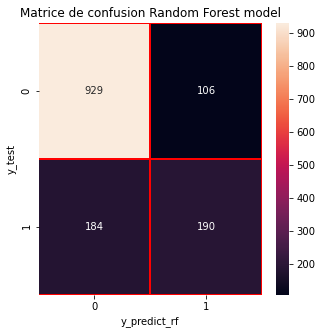

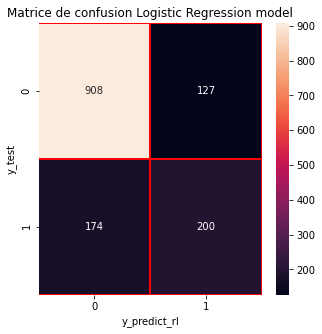

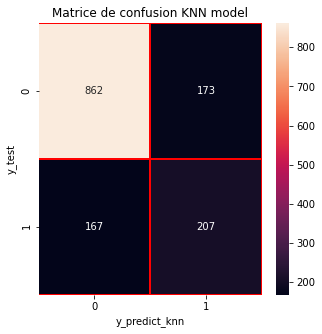

In [98]:
#Matrice de confusion
cm_rf=confusion_matrix(y_test,y_predict_rf)
cm_rl=confusion_matrix(y_test,y_predict_rl) 
cm_knn=confusion_matrix(y_test,y_predict_knn)

#Visualisation de la matrice de confusion
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm_rf,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_predict_rf")
plt.ylabel("y_test")
plt.title("Matrice de confusion Random Forest model")
plt.show()

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm_rl,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_predict_rl")
plt.ylabel("y_test")
plt.title("Matrice de confusion Logistic Regression model")
plt.show()

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm_knn,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_predict_knn")
plt.ylabel("y_test")
plt.title("Matrice de confusion KNN model")
plt.show()

En observant ces 3 matrices de confusion, on voit bien que tous ces 3 modèles souffrent d'un *problème de prédiction* de la modalité **1**.

<br/> Ce problème est essentiellement dû au fait qu'on a plus de **0** que de **1** dans nos données (*déséquilibre dans les données*).

<br/> Ainsi pour pouvoir toujours comparer ces modèles entre eux, même en présence du problème de déséquilibre, on utilise l'indice de mesure de performance **AUC (l'aire sous la courbe ROC)** qui reste **robuste** au problème de *déséquilibre*.

<br/>Mais plus loin, notament dans la seconde sous-partie, on utilisera un remède au problème de *déséquilibre dans les données* (**le rééchantillonnage**).

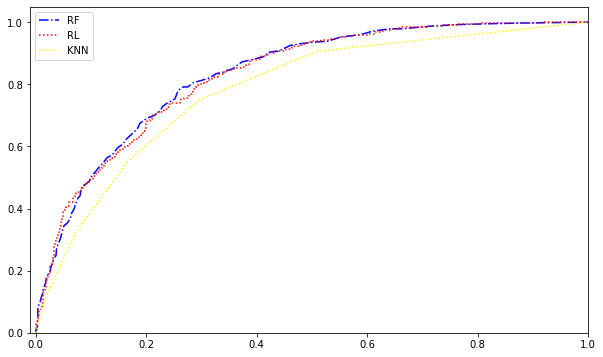

In [99]:
y_prob_rf = model_rf.predict_proba(X_test)[:,1]
y_prob_rl = model_rl.predict_proba(X_test)[:,1]
y_prob_knn = model_knn.predict_proba(X_test)[:,1]

#Cas du modele RF
plt.figure(figsize=(10, 6))
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)
plt.plot(fpr, tpr, 'b-.', label='RF')

#Cas du modèle RL
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rl)
plt.plot(fpr, tpr, ':', label='RL', c='red')

#Cas du modèle KNN
fpr, tpr, thresholds = roc_curve(y_test, y_prob_knn)
plt.plot(fpr, tpr, ':', label='KNN', c='yellow')

plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.legend()

In [100]:
auc_modele_rf = roc_auc_score(y_test, y_predict_rf)
auc_modele_rl = roc_auc_score(y_test, y_predict_rl)
auc_modele_knn = roc_auc_score(y_test, y_predict_knn)

In [101]:
print('AUC du modele RF:',  auc_modele_rf)
print('AUC du modele RL:',  auc_modele_rl)
print('AUC du modele KNN:', auc_modele_knn)

AUC du modele RF: 0.7028029657185668
AUC du modele RL: 0.706027022139554
AUC du modele KNN: 0.6931630886873854


On voit toujours que la *régression logistique* fait mieux que les 2 autres modèles.

## II.2 MODELES OPTIMISES (AVEC DONNEES EQUILIBREES)

Les modèles vus ci-dessus ont été utilisés avec leurs paramètres initialisés par defaut. Dans la suite nous essaierons de trouver de nouveaux paramètres, pour chaque model, qui augmenteront la performance du modèle par rapport à celui par defaut.

<br/>Ces nouveaux modèles seront directement entraînés sur des données corrigées du problème de déséquilibre à travers une technique de rééchantillonage. Cette technique utilisera du *sur-échantillonnage* de la classe minoritaire afin que celle-ci puisse être bien représenter.

##### Equilibrage des données

In [176]:
X_train1= X_train.to_numpy()
y_train1= y_train.to_numpy()

In [273]:
from imblearn.over_sampling import SMOTE
equilibre = SMOTE()
X_equi, y_equi = equilibre.fit_sample(X_train1, y_train1)

In [274]:
pd.Series(y_equi).value_counts()

0    4139
1    4139
dtype: int64

Avec cette technique de rééchantillonnage, on voit bien que les 2 modalités ont le même effectif .

### II.2.1 Random Forest

In [325]:
#Initialisation des grilles de valeurs à tester
model_rf.get_params()
param_grid={'n_estimators':np.arange(99, 102), 'min_samples_leaf':np.arange(1, 3), 'min_samples_split':np.arange(1, 3)}

In [326]:
grid=GridSearchCV(RandomForestClassifier(), param_grid, cv=5)

In [327]:
grid.fit(X_equi, y_equi)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': array([1, 2]),
                         'min_samples_split': array([1, 2]),
                         'n_estimators': array([ 99, 100, 101])})

In [278]:
grid.best_score_

0.8811395712013077

In [279]:
grid.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 99}

Suite à l'optimisation des paramères, on voit que le Random Forest a nettement amélioré ses performances.

### II.2.2 Régression Logistique

In [317]:
#Initialisation des grilles de valeurs à tester
model_rl.get_params()
param_grid={'C': [1,5,10, 15],'penalty':['l2'] }

In [318]:
grid=GridSearchCV(LogisticRegression(), param_grid, cv=5)

In [319]:
grid.fit(X_equi, y_equi)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 5, 10, 15], 'penalty': ['l2']})

In [320]:
grid.best_score_

0.819525008392078

In [321]:
grid.best_params_

{'C': 15, 'penalty': 'l2'}

De même la régression logistique aussi améliore sa performance grâce à l'optimisation des paramètres.

### II.2.3 KNN

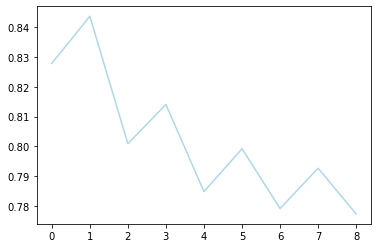

In [285]:
#Recherche du nombre de voisins optimal

Val_score=[]
for i in range(1, 10):
    score = cross_val_score (KNeighborsClassifier(i), X_equi, y_equi, cv=5).mean()
    Val_score.append(score)
plt.plot(Val_score)

En observant cette courbe, on voit que le nombre de voisins optimal est de 2 car c'est le **KNN à 2 voisins** qui a le score le plus élevé. 
Donc par la suite, nous allons continuer avec le **KNN 2**.

In [286]:
#On utilise aussi grid-search pour valider le nombre optimal de voisins qu'on a eu précédemment 
param_grid={'n_neighbors':np.arange(1, 10), 'metric':['euclidean']}

In [287]:
grid=GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_equi, y_equi)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean'],
                         'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [288]:
grid.best_score_

0.8436855816804588

In [289]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 2}

On voit bien que KNN aussi améliore son accuracy. 

Sur le **train set** parmi les 3 modèles optimisés, le **RF** a la meilleure performance.

Pour ce qui suit, on évaluera la performance de ces moèles sur le *test set*. 

##### Evaluation sur le test set

In [322]:
#Meilleurs modèles
model_knn1= KNeighborsClassifier(2)
model_rl1= LogisticRegression(C=15, penalty='l2')
model_rf1= RandomForestClassifier(min_samples_leaf=1, min_samples_split=2, n_estimators=99)

#Entraînement
model_knn1.fit(X_equi, y_equi)
model_rl1.fit(X_equi, y_equi)
model_rf1.fit(X_equi, y_equi)

RandomForestClassifier(n_estimators=99)

In [323]:
#Prédictions
y_predict_knn1 = model_knn1.predict(X_test)
y_predict_rl1 = model_rl1.predict(X_test)
y_predict_rf1 = model_rf1.predict(X_test)

In [304]:
# Matrices de confusion
cm_knn=confusion_matrix(y_test,y_predict_knn1)
cm_rl=confusion_matrix(y_test,y_predict_rl1)
cm_rf=confusion_matrix(y_test,y_predict_rf1)

In [305]:
#Accuracy du meilleur KNN sur le test set
accuracy_score(y_test, y_predict_knn1)

0.7097232079489

In [306]:
#Accuracy de la meilleure RL sur le test set
accuracy_score(y_test, y_predict_rl1)

0.7366926898509581

In [307]:
#Accuracy du meilleur RF sur le test set
accuracy_score(y_test, y_predict_rf1)

0.7828246983676366

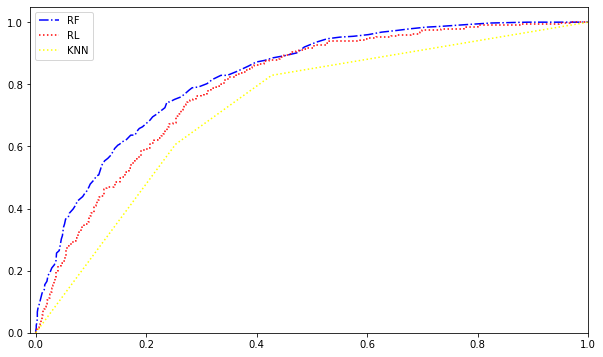

In [324]:
y_prob_rf1 = model_rf1.predict_proba(X_test)[:,1]
y_prob_rl1 = model_rl1.predict_proba(X_test)[:,1]
y_prob_knn1 = model_knn1.predict_proba(X_test)[:,1]

#Cas du modele RF
plt.figure(figsize=(10, 6))
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf1)
plt.plot(fpr, tpr, 'b-.', label='RF')

#Cas du modèle RL
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rl1)
plt.plot(fpr, tpr, ':', label='RL', c='red')

#Cas du modèle KNN
fpr, tpr, thresholds = roc_curve(y_test, y_prob_knn1)
plt.plot(fpr, tpr, ':', label='KNN', c='yellow')

plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.legend()

In [309]:
auc_modele_rf1 = roc_auc_score(y_test, y_predict_rf1)
auc_modele_rl1 = roc_auc_score(y_test, y_predict_rl1)
auc_modele_knn1 = roc_auc_score(y_test, y_predict_knn1)

In [310]:
print('AUC du modele RF:',  auc_modele_rf1)
print('AUC du modele RL:',  auc_modele_rl1)
print('AUC du modele KNN:', auc_modele_knn1)

AUC du modele RF: 0.7147110491100261
AUC du modele RL: 0.7029476349169443
AUC du modele KNN: 0.6769058875196983


# III. CONCLUSION

Aux termes de l'étude, il ressort que le **meilleur modèle**, parmi les 3 étudiés, pour bien prédire la variable cible "Churn Value" est le modèle **Random Forest** avec les paramètres **{min_samples_leaf=1, min_samples_split=2, n_estimators=99}**.

<br/>Place alors à la mise en production de ce modèle.